<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap05/5_1_Least_Squares_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 5.1: Least Squares Loss**

This notebook investigates the least squares loss and the equivalence of maximum likelihood and minimum negative log likelihood.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

- ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import math

### Define Function

- ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

In [2]:
# Get parameters for model - parameters ÏâΩÍ≤å Ïû¨ÏÑ§Ï†ï Í∞ÄÎä•
# ÏûÖÎ†• 1, ÏùÄÎãâÏ∏µ1(ÏùÄÎãâÏú†Îãõ3), Ï∂úÎ†• 1
def get_parameters():
  # ÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÄÏû•ÌïòÎäî ÌñâÎ†¨
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 0.1
  omega_1[0,0] = -2.0; omega_1[0,1] = -1.0; omega_1[0,2] = 7.0

  return beta_0, omega_0, beta_1, omega_1

- Ïã†Í≤ΩÎßù Íµ¨Ï∂ï

In [3]:
# Define ReLU function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    x = np.reshape(x,(1, x.size))
    # numpy.reshape(a, newshape)
    # a: ÌòïÌÉúÎ•º Î≥ÄÍ≤ΩÌï† Î∞∞Ïó¥Ïù¥Îã§.
    # newshape: Î≥ÄÍ≤ΩÌïòÎ†§Îäî Î∞∞Ïó¥Ïùò ÏÉàÎ°úÏö¥ shape -> 2Ï∞®Ïõê(1Ìñâ x.sizeÏó¥) -> Î∞ëÏóê ÌñâÎ†¨ÎÅºÎ¶¨ Ïó∞ÏÇ∞ÏùÑ ÌïòÍ∏∞ ÏúÑÌï¥ (100,) -> (1,100)

    # h_k = a[beta_k-1 + omega_k-1 * h_k-1]
    h1 = ReLU(np.matmul(beta_0,np.ones((1, x.size))) + np.matmul(omega_0, x))
    # np.matmul: Îëê ÌñâÎ†¨Ïùò ÎÇ¥Ï†Å
    # np.ones(shape, dtype=None, order='C'): shpaeÌòïÌÉúÏù∏ Î∞∞Ïó¥ ÏÉùÏÑ±, Î∞∞Ïó¥ Ïïà ÏõêÏÜåÎäî Îã§ 1
    #                                        dtype: Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú (none: Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Ï∂îÎ°†ÌïòÏó¨ Ï†ÅÏ†àÌïú Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ)
    #                                        order: Î∞∞Ïó¥Ïùò ÏöîÏÜåÍ∞Ä Î©îÎ™®Î¶¨Ïóê Î∞∞ÏπòÎêòÎäî ÏàúÏÑú(C: Ìñâ, F:Ïó¥)
    # beta_0ÏùÄ np.matmul(omega_0, x)ÏôÄ ÎçîÌïòÍ∏∞ ÏúÑÌï¥ ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Î•º ÎßûÏ∂∞ÏïºÌï®.

    # y = beta_k + omega_k * h_k
    y = np.matmul(beta_1,np.ones((1, x.size))) + np.matmul(omega_1, h1)
    return y

# Univariate regression

Í∑∏Î¶º 5.5bÏôÄ Í∞ôÏù¥ Îã®Ïùº ÏûÖÎ†• $x$ÏôÄ Îã®Ïùº Ï∂úÎ†• $y$Î•º ÏÇ¨Ïö©ÌïòÎäî Îã®Ïàú ÏùºÎ≥ÄÎüâ ÌöåÍ∑Ä ÏÉÅÌô©

In [4]:
# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Ìï®ÏàòÏ†ïÏùò
def plot_univariate_regression(x_model, y_model, x_data=None, y_data=None, sigma_model=None, title=None):
    # Î∞∞Ïó¥Ïùò Ï∞®ÏõêÏùÑ Ï∂ïÏÜå
    x_model = np.squeeze(x_model)  # (100,)
    y_model = np.squeeze(y_model)  # (100,)
    # 2Ï∞®Ïõê plotÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ xÏôÄ y 1Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜå
    # np.squeeze(arr, axis=None): arrÏùò Ï∞®Ïõê Ï∂ïÏÜå, axis ÏßÄÏ†ïÏùÑ ÏïàÌï¥Ï£ºÎ©¥ ÌÅ¨Í∏∞Í∞Ä 1Ïù∏ Ï∞®Ïõê Ï†úÍ±∞
    #                             ex) (1,100) -> (100,)

    plt.plot(x_model, y_model)

    # sigma ÏßÄÏ†ï Ìï¥Ï§¨ÏùÑ Îïå Ïã§Ìñâ
    if sigma_model is not None:
        plt.fill_between(x_model, y_model - 2 * sigma_model, y_model + 2 * sigma_model, color='lightgray')
        #  y_model - 2*sigma_modelÏôÄ y_model + 2*sigma_model ÏÇ¨Ïù¥Î•º Ï±ÑÏõÄ

    plt.xlabel('Input, $x$')
    plt.ylabel('Output, $y$')
    plt.xlim([0, 1])
    plt.ylim([-1, 1])
    plt.gca().set_aspect(0.5)  # ÌòÑÏû¨ Ï∂ïÏùò aspect ratioÎ•º ÏÑ§Ï†ï

    # ÌÉÄÏù¥ÌãÄ ÏßÄÏ†ïÌï¥Ï§¨ÏùÑ ÎñÑ Ïã§Ìñâ
    if title is not None:
        plt.title(title)

    # x_dataÍ∞Ä ÏûàÏùÑ Îïå Ïã§Ìñâ
    if x_data is not None:
        plt.plot(x_data, y_data, 'ko')

    plt.show()

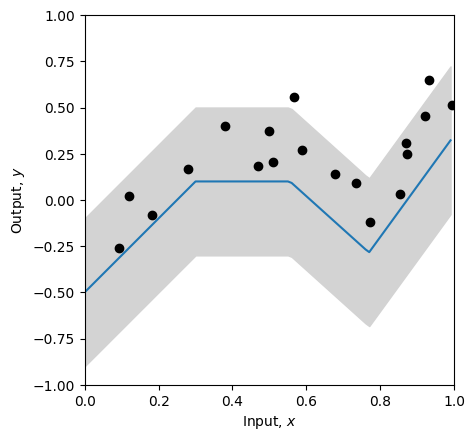

In [5]:
# 1D training data
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,\
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444, \
                    0.248038840,0.26824970])

# ÌååÎùºÎØ∏ÌÑ∞ ÏßÄÏ†ï
# beta_0: (3,1) / omega_0: (3,1) / beta_1: (1, 1) / omega_1: (1, 3)
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2


# shallow neural network
x_model = np.arange(0,1,0.01)   # x_model: array(100,)
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1) # y_model: ÌñâÎ†¨(1,100)

# univariate regression plot
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma)

In [22]:
type(y_model)

numpy.ndarray

ÌååÎûÄÏÉâ ÏÑ†ÏùÄ Î™®ÌòïÏùò ÌèâÍ∑† ÏòàÏ∏°Í∞íÏù¥Í≥† ÌöåÏÉâ ÏòÅÏó≠ÏùÄ ÌëúÏ§Ä Ìé∏Ï∞® ÌîåÎü¨Ïä§/ÎßàÏù¥ÎÑàÏä§Î•º ÎÇòÌÉÄÎÉÑ.<br>
Ïù¥ Î™®Îç∏ÏùÄ Ï†ÅÌï©ÌïòÏßÄÎßå, Í∞úÏÑ†Ìï† Ïàò ÏûàÏùå.<br>
ÏµúÏÜå Ï†úÍ≥± Ïò§Ï∞®, Ïö∞ÎèÑ, ÏùåÏàò Î°úÍ∑∏ Ïö∞ÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞Ìï† Í≤ÉÏûÑ.

### normal distribution

$
= Pr(y | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(y-\mu)^2}{2\sigma^2}}, \quad \mu = f[ùê±, ùùì]
$


$
= Pr(y | f[ùê±, ùùì], \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(y-f[ùê±, ùùì])^2}{2\sigma^2}}
$



---



-
$
Pr(y | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(y-\mu)^2}{2\sigma^2}}
$

In [6]:
# Return probability under normal distribution
def normal_distribution(y, mu, sigma):

    prob = (1 / (np.sqrt(2 * math.pi) * sigma)) * np.exp(-((y - mu)**2) / (2 * (sigma**2)))

    return prob

In [7]:
# check
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.119,normal_distribution(1,-1,2.3)))

Correct answer = 0.119, Your answer = 0.119


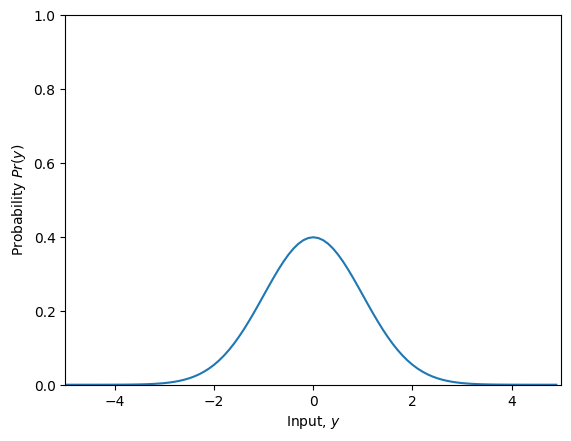

In [8]:
# normal distribution plot
# yÍ∞Ä Ï£ºÏñ¥Ï°åÏùÑ ÎïåÏùò ÌôïÎ•† Pr(y)
y_gauss = np.arange(-5,5,0.1)
mu = 0; sigma = 1.0
gauss_prob = normal_distribution(y_gauss, mu, sigma)
fig, ax = plt.subplots()
ax.plot(y_gauss, gauss_prob) #(100,)
ax.set_xlabel('Input, $y$'); ax.set_ylabel('Probability $Pr(y)$')
ax.set_xlim([-5,5]);ax.set_ylim([0,1.0])
plt.show()

### likelihood

-
$
L(ùùì) = \prod_{i=1}^I Pr(ùê≤_i | \mu, \sigma^2)
$

In [9]:
# likelihood of all of the data under the model
def compute_likelihood(y_train, mu, sigma):

  likelihood = np.prod(normal_distribution(y_train, mu, sigma))
  # np.prod() : Ï¥ù Í≥±

  return likelihood

-
$
L(ùùì) = \prod_{i=1}^I Pr(ùê≤_i | f[ùê±_i, ùùì], \sigma^2)
$

In [10]:
# Îì±Î∂ÑÏÇ∞(homoscedastic) Î™®Îç∏ ÎåÄÌï¥ ÌÖåÏä§Ìä∏
beta_0, omega_0, beta_1, omega_1 = get_parameters()
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1) # neural networkÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌèâÍ∑†ÏùÑ ÏòàÏ∏°(x_train: (20,))

sigma = 0.2
likelihood = compute_likelihood(y_train, mu_pred, sigma)

# check
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000010624,likelihood))

Correct answer = 0.000010624, Your answer = 0.000010624


### negative log likelihood

Ïó¨Îü¨ ÌôïÎ•†Ïùò Í≥±ÏùÄ Îß§Ïö∞ ÏûëÏùÑ Ïàò ÏûàÏùå -> Ïö∞ÎèÑÏùò Î°úÍ∑∏ ÏµúÎåÄÌôîÏôÄ Í∞í Í∞ôÏùå <br>
Î™®Îç∏ Ï†ÅÌï©ÏùÄ ÏÜêÏã§ÏùÑ ÏµúÏÜåÌôî Ìï¥ÏïºÌïòÎØÄÎ°ú ÏµúÎåÄ Î°úÍ∑∏ Ïö∞ÎèÑ Í∏∞Ï§ÄÏùÑ ÏµúÏÜåÌôî Î¨∏Ï†úÎ°ú Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌï¥ ÏùåÏàòÎ•º Í≥±Ìï¥ÏïºÌï® <br>
-> ÏùåÏùò Î°úÍ∑∏ Ïö∞ÎèÑ ÏµúÏÜåÌôî

-
$
L(ùùì) = - \sum_{i=1}^I log[ Pr(ùê≤_i | \mu, \sigma^2)]
$

In [11]:
# negative log likelihood of the data under the model
def compute_negative_log_likelihood(y_train, mu, sigma):

  nll = - np.sum(np.log(normal_distribution(y_train, mu, sigma)))

  return nll

-
$
L(ùùì) = -\sum_{i=1}^I log[ Pr(ùê≤_i | f[ùê±_i, ùùì], \sigma^2)]
$

In [12]:
# Îì±Î∂ÑÏÇ∞(homoscedastic) Î™®Îç∏ ÎåÄÌï¥ ÌÖåÏä§Ìä∏
beta_0, omega_0, beta_1, omega_1 = get_parameters()
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

sigma = 0.2
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)

# check
print("Correct answer = %9.9f, Your answer = %9.9f"%(11.452419564,nll))

Correct answer = 11.452419564, Your answer = 11.452419564


### sum of squares

-
$
L(ùùì)=\sum_{i=1}^I(y_i-f[ùê±_i, ùùì])^2
$

In [13]:
# Return the squared distance between the observed data (y_train) and the prediction of the model (y_pred)
def compute_sum_of_squares(y_train, y_pred):

  sum_of_squares = np.sum((y_train - y_pred) ** 2)

  return sum_of_squares

In [14]:
# Let's test this again
beta_0, omega_0, beta_1, omega_1 = get_parameters()

y_pred = mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
sum_of_squares = compute_sum_of_squares(y_train, y_pred)

# check
print("Correct answer = %9.9f, Your answer = %9.9f"%(2.020992572,sum_of_squares))

Correct answer = 2.020992572, Your answer = 2.020992572


## ÏµúÏ†ÅÏùò $\boldsymbol\beta_{1}$

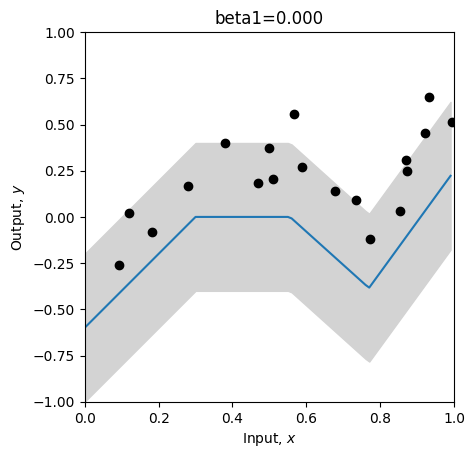

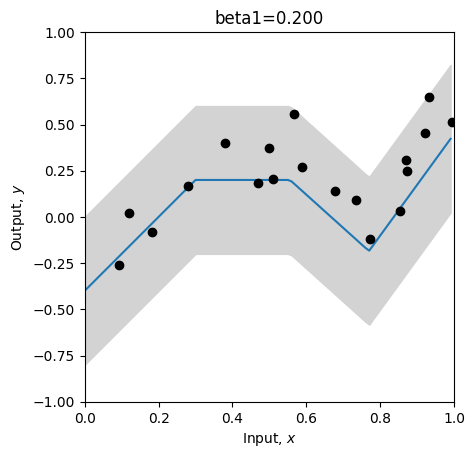

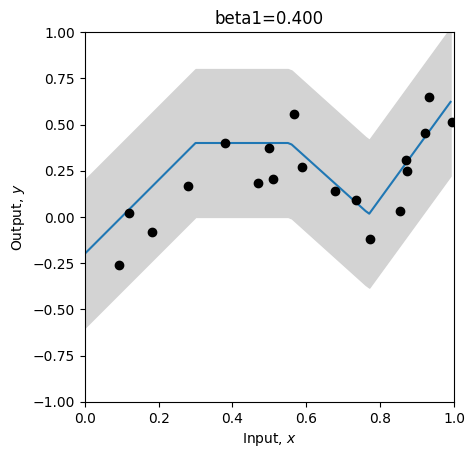

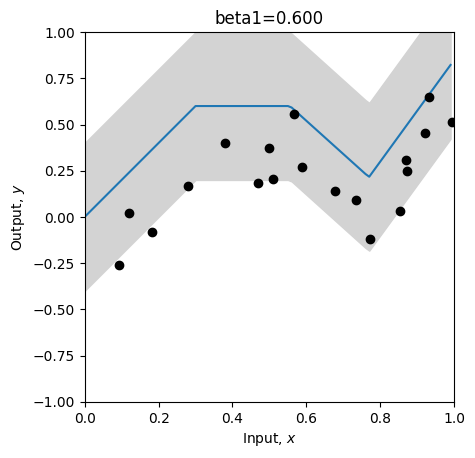

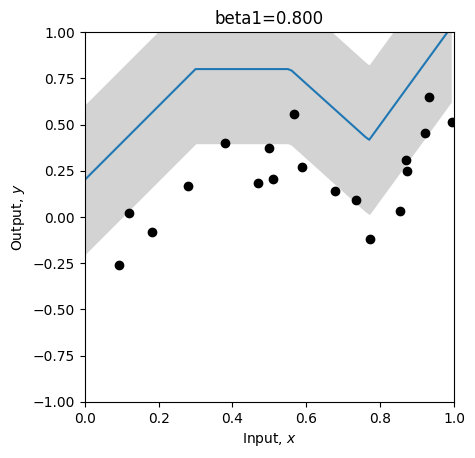

In [15]:
# parametarÏùò Î≤îÏúÑ ÏßÄÏ†ï
beta_1_vals = np.arange(0,1,0.01) # (100,)

# beta_1_valsÏùò Í∞íÏóê Îî∞Î•∏ Ïö∞ÎèÑ, ÏùåÏùò Î°úÍ∑∏ Ïö∞ÎèÑ, Ï†úÍ≥±Ìï©ÏùÑ Ï†ÄÏû•Ìï† Î∞∞Ïó¥ ÏÉùÏÑ±(Ï¥àÍ∏∞Í∞í)
likelihoods = np.zeros_like(beta_1_vals) # (100,) ÌÅ¨Í∏∞Í∞Ä 100Ïù¥Í≥† ÏïàÏóê ÏõêÏÜåÎì§Ïù¥ Î™®Îëê 0Ïù∏ Î≤°ÌÑ∞ ÏÉùÏÑ±
nlls = np.zeros_like(beta_1_vals)
sum_squares = np.zeros_like(beta_1_vals)

# ÌååÎùºÎØ∏ÌÑ∞ ÏßÄÏ†ï
# beta_0: (3,1) / omega_0: (3,1) / beta_1: (1, 1) / omega_1: (1, 3)
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2

for count in range(len(beta_1_vals)):  # 100Î≤à Î∞òÎ≥µ
  beta_1[0,0] = beta_1_vals[count]  # arange(0,1,0.01) ÌïúÎ≤àÏî© ÎÑ£Ïñ¥Î≥¥Í∏∞
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)

  if count % 20 == 0: # % : ÎÇòÎàÑÍ∏∞Ïùò ÎÇòÎ®∏ÏßÄ -> 20ÏúºÎ°ú ÎÇòÎàåÎïå ÎÇòÎ®∏ÏßÄÍ∞Ä 0ÏùºÎïåÎßå ÏãúÍ∞ÅÌôî
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))


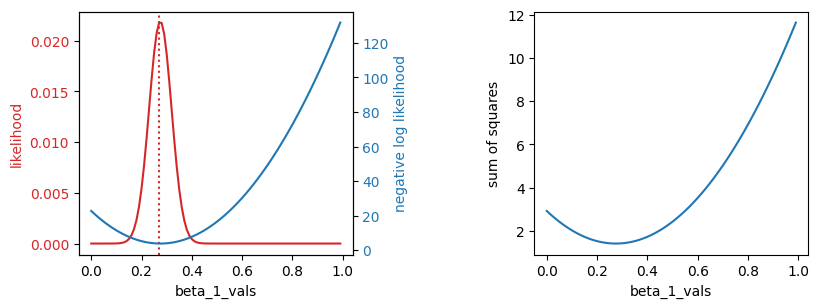

In [16]:
# beta_1Ïùò Í∞íÏóê ÎåÄÌïú Ïö∞ÎèÑ, ÏùåÏùò Î°úÍ∑∏ Ïö∞ÎèÑ, ÏµúÏÜå Ï†úÍ≥± plot
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red' #  MatplotlibÏùò ÏÉâÏÉÅ ÌåîÎ†àÌä∏
nll_color = 'tab:blue'

# likelihoodÏôÄ negative log likelihoodÏùò plot
# likelihood
ax[0].plot(beta_1_vals, likelihoods, color = likelihood_color)
ax[0].set_xlabel('beta_1_vals'); ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color) # yÏ∂ï ÎààÍ∏àÏùò ÏÜçÏÑ± ÏÑ§Ï†ï(label 90ÎèÑ ÌöåÏ†Ñ)
# ÏÉàÎ°úÏö¥ yÏ∂ïÏùÑ Ï∂îÍ∞Ä(negative log likelihood)
ax00 = ax[0].twinx()
ax00.plot(beta_1_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)
# Í∑∏ÎûòÌîÑÏùò ÏàòÏßÅÏÑ†
ax[0].axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted', color=likelihood_color)

# sum of squaresÏùò plot
ax[1].plot(beta_1_vals, sum_squares)
ax[1].set_xlabel('beta_1_vals'); ax[1].set_ylabel('sum of squares')

plt.show()

Maximum likelihood = 0.022, at beta_1=0.270
Minimum negative log likelihood = 3.826, at beta_1=0.270
Least squares = 1.411, at beta_1=0.270


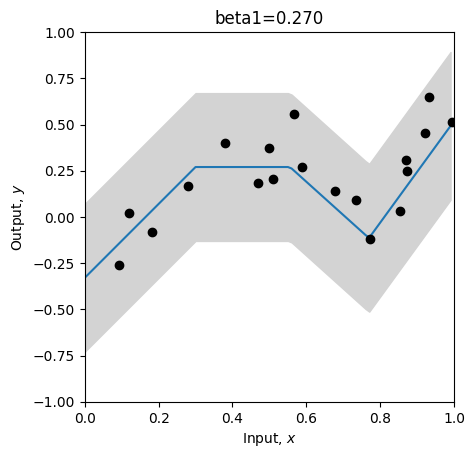

In [17]:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))
print("Least squares = %3.3f, at beta_1=%3.3f"%( (sum_squares[np.argmin(sum_squares)],beta_1_vals[np.argmin(sum_squares)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(sum_squares)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))

### ÏµúÏ†ÅÏùò $\sigma$

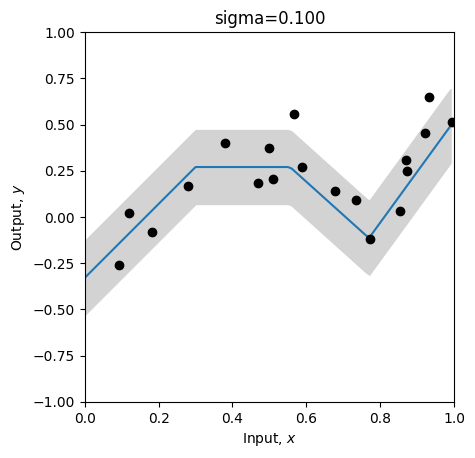

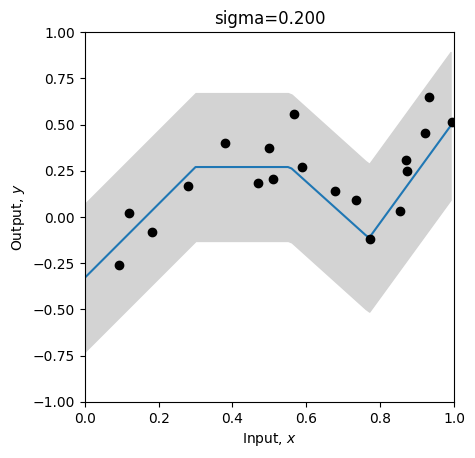

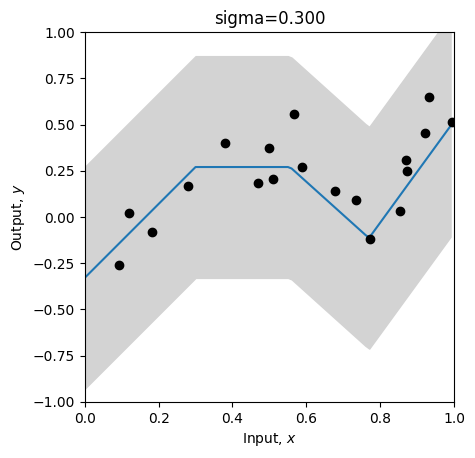

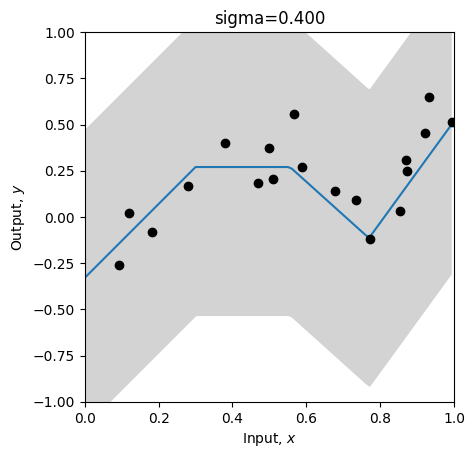

In [18]:
# sigma Ï°∞Ï†ï
sigma_vals = np.arange(0.1,0.5,0.005)

likelihoods = np.zeros_like(sigma_vals)
nlls = np.zeros_like(sigma_vals)
sum_squares = np.zeros_like(sigma_vals)


beta_0, omega_0, beta_1, omega_1 = get_parameters()
# ÏµúÏ†ÅÏùò offset
beta_1[0,0] = 0.27

for count in range(len(sigma_vals)):
  sigma = sigma_vals[count]

  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)

  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma, title="sigma=%3.3f"%(sigma))

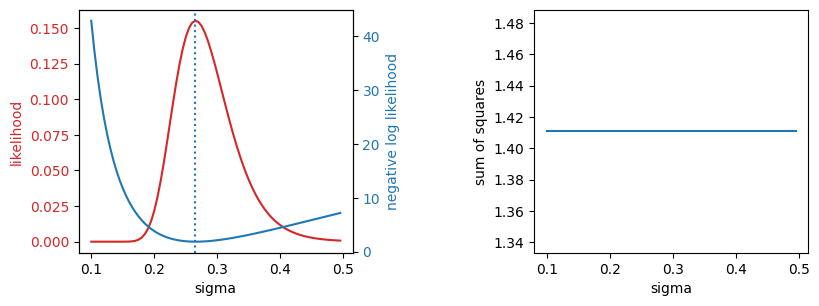

In [19]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the standard deviation sigma
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax[0].set_xlabel('sigma')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(sigma_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(sigma_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = sigma_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(sigma_vals, sum_squares); ax[1].set_xlabel('sigma'); ax[1].set_ylabel('sum of squares')
plt.show()

-> ÏµúÏÜåÏ†úÍ≥±Ìï¥Îäî ÏãúÍ∑∏ÎßàÏóê ÏùòÏ°¥ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÌèâÌèâÌï®

Maximum likelihood = 0.155, at sigma=0.265
Minimum negative log likelihood = 1.864, at sigma=0.265


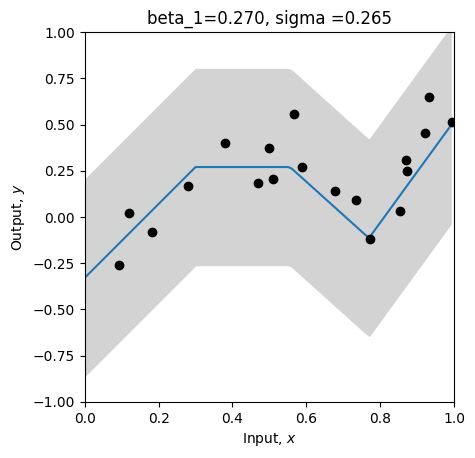

In [20]:
print("Maximum likelihood = %3.3f, at sigma=%3.3f"%( (likelihoods[np.argmax(likelihoods)],sigma_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at sigma=%3.3f"%( (nlls[np.argmin(nlls)],sigma_vals[np.argmin(nlls)])))

# Plot the best model
sigma= sigma_vals[np.argmin(nlls)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta_1=%3.3f, sigma =%3.3f"%(beta_1[0,0],sigma))

Ïó¨Í∏∞ÏÑúÎäî ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò Î™®Îì† 10Í∞ú ÌååÎùºÎØ∏ÌÑ∞Î•º ÎèôÏãúÏóê Î≥ÄÍ≤ΩÌïòÎäî ÎåÄÏã†Ïóê, <br>
$\boldsymbol\beta_{0},\boldsymbol\beta_{1}, \boldsymbol\Omega_{1}$ (and maybe $\sigma$)Î°ú Ïù¥Î£®Ïñ¥ÏßÑ ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò ÌååÎùºÎØ∏ÌÑ∞Î•º ÌïòÎÇòÏî© Î≥ÄÍ≤ΩÌï©ÎãàÎã§.

Ïó¨Îü¨ Í∞úÏùò ÌååÎùºÎØ∏ÌÑ∞Î•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÎäî Í≤ÉÏùÑ **coordinate descent**Ïù¥ÎùºÍ≥† Ìï®.
